In [1]:
import uproot
from coffea import util
import coffea
from hist import Hist
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import matplotlib.pyplot as plt
import uproot3
import itertools
import numpy as np
import pandas as pd

/opt/conda/lib/python3.8/site-packages/awkward0/__init__.py:8: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if distutils.version.LooseVersion(numpy.__version__) < distutils.version.LooseVersion("1.13.1"):


### Get contents of nanoaod

In [3]:
# fname = 'root://xcache//store/data/Run2016B/JetHT/NANOAOD/ver1_HIPM_UL2016_MiniAODv2_NanoAODv9-v2/2430000/341EF3A8-3C77-8C4F-A0F6-A71CCB9FAF37.root'
# fname = 'root://xcache//store/mc/RunIISummer20UL16NanoAODv9/TT_Mtt-1000toInf_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_v17-v1/270000/7B50DBA5-347A-7D43-8A65-68E0A5845EF3.root'
fname = 'root://xcache//store/mc/RunIISummer20UL16NanoAODAPVv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/NANOAODSIM/106X_mcRun2_asymptotic_preVFP_v11-v1/280000/28D6431D-53B5-4848-9711-1004968A7B19.root'


rfile = uproot.open(fname)
events = NanoEventsFactory.from_root(fname, schemaclass=NanoAODSchema).events()
# events.fields
# events['LHEPdfWeight']


In [4]:
len(events.L1PreFiringWeight['Up']), len(events.event)

(89300, 89300)

In [16]:
for f in events.FatJet.fields: 
    if ('gen' in f.lower()):
        print(f)

genJetAK8Idx
genJetAK8IdxG


In [12]:
even

<Array [44161, 44161, ... 103785, 103785] type='89300 * uint32[parameters={"__do...'>

In [26]:
events['Generator']['weight']

<Array [0.0179, 0.05, ... 1.79e-09, 1.6e-13] type='89300 * float32[parameters={"...'>

In [11]:
for field in events['Generator'].fields:
    print(field, events['Generator'][field])
# print(events['Generator']['xpdf1'])
# print(events['Generator']['xpdf2'])


binvar [32.2, 24.3, 15.8, 131, 23.9, 166, ... 2.19e+03, 4.15e+03, 49.4, 1.09e+03, 3.11e+03]
scalePDF [32.3, 24.3, 15.8, 131, 23.9, 166, ... 2.19e+03, 4.15e+03, 49.4, 1.09e+03, 3.11e+03]
weight [0.0179, 0.05, 0.229, 8.43e-05, 0.0529, ... 1.95e-15, 0.00372, 1.79e-09, 1.6e-13]
x1 [0.00182, 0.000145, 0.00277, 0.242, 0.0285, ... 0.435, 0.502, 0.147, 0.243, 0.445]
x2 [0.0179, 0.127, 0.00896, 0.00314, 0.00223, ... 0.324, 0.829, 0.0315, 0.131, 0.784]
xpdf1 [18.3, 43.9, 13, 0.145, 0.503, 8.8, ... 0.28, 0.11, 0.0609, 0.312, 0.0113, 0.00182]
xpdf2 [0.663, 0.728, 7.47, 16.9, 15.7, 0.244, ... 0.225, 0.000416, 3.41, 0.429, 0.00245]
id1 [21, 21, 21, 21, 1, 21, 2, 21, 21, 2, 2, ... -3, 2, 3, 21, 21, 2, 2, 2, 1, -2, -1]
id2 [2, 21, 21, 21, 21, 21, 2, 21, 21, 21, 1, ... 21, 2, 21, 21, 1, 2, 2, -3, 21, 21, 2]


In [8]:
xpdf1 = events['Generator']['xpdf1']
xpdf2 = events['Generator']['xpdf2']

In [19]:
  inline double weightxQ2(int id, double x, double Q2, const PDF& basepdf, const PDF& newpdf, double aschk=5e-2) {
    if (aschk >= 0) _checkAlphasQ2(Q2, basepdf, newpdf, aschk);
    const double xf_base = basepdf.xfxQ2(id, x, Q2);
    const double xf_new = newpdf.xfxQ2(id, x, Q2);
    return xf_new / xf_base;
 
 
 
  inline double weightxxQ2(int id1, int id2, double x1, double x2, double Q2, const PDF& basepdf, const PDF& newpdf, double aschk=5e-2) {
    if (aschk >= 0) _checkAlphasQ2(Q2, basepdf, newpdf, aschk);
    const double w1 = weightxQ2(id1, x1, Q2, basepdf, newpdf, -1);
    const double w2 = weightxQ2(id2, x2, Q2, basepdf, newpdf, -1);
    return w1 * w2;

SyntaxError: invalid syntax (3327667123.py, line 1)

In [20]:
import lhapdf

ModuleNotFoundError: No module named 'lhapdf'

In [21]:
import ROOT

ModuleNotFoundError: No module named 'ROOT'

In [ ]:


def weightxQ2(x, Q2, basepdf, newpdf, idx):
    
    xf_base = basepdf.eval(idx, x, Q2)
    xf_new  =  newpdf.eval(idx, x, Q2)
    
    return xf_new / xf_base
    
def weightxxQ2(x1, x2, Q2, basepdf, newpdf, pgdid)
    
    w1 = weightxQ2(x1, Q, basepdf, newpdf, id1)
    w2 = weightxQ2(x2, Q, basepdf, newpdf, id1)

    return w1 * w2    

In [ ]:
def weightxxQ2(xpdf1, xpdf2)
    
    w1 = weightxQ2(x1, Q, basepdf, newpdf)
    w2 = weightxQ2(x2, Q, basepdf, newpdf)

    return w1 * w2

In [17]:
def weightxxQ2(xpdf1, xpdf2):
    
    xf1_new = np.ones_like(xpdf1)
    xf1_base = np.ones_like(xpdf1)
    xf2_new = np.ones_like(xpdf2)
    xf2_base = np.ones_like(xpdf2)
    
    w1 = xf1_new / xf1_base
    w2 = xf2_new / xf2_base

    return w1 * w2
    
    

In [18]:
weightxxQ2(xpdf1, xpdf2)

<Array [1, 1, 1, 1, 1, 1, ... 1, 1, 1, 1, 1, 1] type='89300 * float32'>

In [5]:
print(pdf1)
print(pdf2)

NameError: name 'pdf1' is not defined

In [6]:
events.FatJet.fields

['area',
 'btagCSVV2',
 'btagDDBvLV2',
 'btagDDCvBV2',
 'btagDDCvLV2',
 'btagDeepB',
 'btagHbb',
 'deepTagMD_H4qvsQCD',
 'deepTagMD_HbbvsQCD',
 'deepTagMD_TvsQCD',
 'deepTagMD_WvsQCD',
 'deepTagMD_ZHbbvsQCD',
 'deepTagMD_ZHccvsQCD',
 'deepTagMD_ZbbvsQCD',
 'deepTagMD_ZvsQCD',
 'deepTagMD_bbvsLight',
 'deepTagMD_ccvsLight',
 'deepTag_H',
 'deepTag_QCD',
 'deepTag_QCDothers',
 'deepTag_TvsQCD',
 'deepTag_WvsQCD',
 'deepTag_ZvsQCD',
 'eta',
 'mass',
 'msoftdrop',
 'n2b1',
 'n3b1',
 'particleNetMD_QCD',
 'particleNetMD_Xbb',
 'particleNetMD_Xcc',
 'particleNetMD_Xqq',
 'particleNet_H4qvsQCD',
 'particleNet_HbbvsQCD',
 'particleNet_HccvsQCD',
 'particleNet_QCD',
 'particleNet_TvsQCD',
 'particleNet_WvsQCD',
 'particleNet_ZvsQCD',
 'particleNet_mass',
 'phi',
 'pt',
 'rawFactor',
 'tau1',
 'tau2',
 'tau3',
 'tau4',
 'lsf3',
 'jetId',
 'subJetIdx1',
 'subJetIdx2',
 'electronIdx3SJ',
 'muonIdx3SJ',
 'nConstituents',
 'genJetAK8Idx',
 'hadronFlavour',
 'nBHadrons',
 'nCHadrons',
 'genJetAK8IdxG

### load .coffea file

In [7]:
# output = util.load('test.coffea')
output = util.load('TTbar_output.coffea')
# output = util.load('RSGluon3000_output.coffea')

FileNotFoundError: [Errno 2] No such file or directory: 'TTbar_output.coffea'

In [8]:
coffea.hist.plot1d(output['ttbarmass_jer_up'].sum('anacat'))
coffea.hist.plot1d(output['ttbarmass_jer'].sum('anacat'))
coffea.hist.plot1d(output['ttbarmass_jer_down'].sum('anacat'))
plt.legend(['JER', 'JER down', 'JER up'])

AttributeError: module 'coffea' has no attribute 'hist'

In [9]:
# output = util.load('test.coffea')
output = util.load('TTbar_output.coffea')
# output = util.load('RSGluon3000_output.coffea')

FileNotFoundError: [Errno 2] No such file or directory: 'TTbar_output.coffea'

In [10]:
# output['jetpt_jec'].axis('anacat').identifiers()

In [11]:
h = output['jetpt_jec'].integrate('anacat','2t2bcen').sum('dataset')
coffea.hist.plot1d(h)

NameError: name 'output' is not defined

### coffea.hist.export1d
export coffea histogram to root file

In [12]:
# hname = 'RSGluon3000_cen2b_jetpt'


# fout = uproot3.create(hname+'.root')
# fout[hname] = coffea.hist.export1d(h)
# fout.close()

In [3]:
import itertools

In [4]:
ttagcats = ["AT&Pt", "at", "pret", "0t", "1t", ">=1t", "2t", ">=0t"]
btagcats = ['0b', '1b', '2b']
ycats = ['cen', 'fwd']
labels = [ t+b+y for t,b,y in itertools.product( ttagcats, btagcats, ycats) ]
label_map = {i: label for i, label in enumerate(labels)}

In [10]:
label_map

{0: 'AT&Pt0bcen',
 1: 'AT&Pt0bfwd',
 2: 'AT&Pt1bcen',
 3: 'AT&Pt1bfwd',
 4: 'AT&Pt2bcen',
 5: 'AT&Pt2bfwd',
 6: 'at0bcen',
 7: 'at0bfwd',
 8: 'at1bcen',
 9: 'at1bfwd',
 10: 'at2bcen',
 11: 'at2bfwd',
 12: 'pret0bcen',
 13: 'pret0bfwd',
 14: 'pret1bcen',
 15: 'pret1bfwd',
 16: 'pret2bcen',
 17: 'pret2bfwd',
 18: '0t0bcen',
 19: '0t0bfwd',
 20: '0t1bcen',
 21: '0t1bfwd',
 22: '0t2bcen',
 23: '0t2bfwd',
 24: '1t0bcen',
 25: '1t0bfwd',
 26: '1t1bcen',
 27: '1t1bfwd',
 28: '1t2bcen',
 29: '1t2bfwd',
 30: '>=1t0bcen',
 31: '>=1t0bfwd',
 32: '>=1t1bcen',
 33: '>=1t1bfwd',
 34: '>=1t2bcen',
 35: '>=1t2bfwd',
 36: '2t0bcen',
 37: '2t0bfwd',
 38: '2t1bcen',
 39: '2t1bfwd',
 40: '2t2bcen',
 41: '2t2bfwd',
 42: '>=0t0bcen',
 43: '>=0t0bfwd',
 44: '>=0t1bcen',
 45: '>=0t1bfwd',
 46: '>=0t2bcen',
 47: '>=0t2bfwd'}

In [7]:
labels = [ t+b+y for t,b,y in itertools.product( ttagcats, btagcats, ycats) ]

In [8]:
for i, label in enumerate(labels):
    print(i, label)

0 AT&Pt0bcen
1 AT&Pt0bfwd
2 AT&Pt1bcen
3 AT&Pt1bfwd
4 AT&Pt2bcen
5 AT&Pt2bfwd
6 at0bcen
7 at0bfwd
8 at1bcen
9 at1bfwd
10 at2bcen
11 at2bfwd
12 pret0bcen
13 pret0bfwd
14 pret1bcen
15 pret1bfwd
16 pret2bcen
17 pret2bfwd
18 0t0bcen
19 0t0bfwd
20 0t1bcen
21 0t1bfwd
22 0t2bcen
23 0t2bfwd
24 1t0bcen
25 1t0bfwd
26 1t1bcen
27 1t1bfwd
28 1t2bcen
29 1t2bfwd
30 >=1t0bcen
31 >=1t0bfwd
32 >=1t1bcen
33 >=1t1bfwd
34 >=1t2bcen
35 >=1t2bfwd
36 2t0bcen
37 2t0bfwd
38 2t1bcen
39 2t1bfwd
40 2t2bcen
41 2t2bfwd
42 >=0t0bcen
43 >=0t0bfwd
44 >=0t1bcen
45 >=0t1bfwd
46 >=0t2bcen
47 >=0t2bfwd


In [13]:
bcats = ['0b', '1b', '2b']
ycats = ['cen', 'fwd']
# dsname = 'RSGluon3000'
dsname = 'TTbar'
histnames = ['ttbarmass', 'jetpt']
systs = ['', '_jerUp', '_jerDown']
fname = dsname+'Combine.root'

fout = uproot3.create(fname)
print('creating '+fname)


for histname in histnames:
    for bcat in bcats:
        for ycat in ycats:
            for syst in systs:

                cat = '2t' + bcat + ycat
                hname = dsname+'_'+ycat+bcat+'_'+histname+syst

                if 'Down' in syst:
                    h = output['jetpt_jec_down'].integrate('anacat',cat).sum('dataset')
                elif 'Up' in syst:
                    h = output['jetpt_jec_up'].integrate('anacat',cat).sum('dataset')
                else:
                    h = output['jetpt_jec'].integrate('anacat',cat).sum('dataset')


                fout[hname] = coffea.hist.export1d(h)

                print(hname)


        

         

fout.close()

        
        

creating TTbarCombine.root


NameError: name 'output' is not defined

In [14]:
import hist

In [15]:
h = Hist.new

In [16]:
hist.plot1d(h)

AttributeError: module hist has no attribute plot1d

In [17]:
hist

<module 'hist' from '/opt/conda/lib/python3.8/site-packages/hist/__init__.py'>

In [18]:
h = (
  Hist.new
  .Reg(10, 0 ,1, name="x", label="x-axis")
  .Var(range(10), name="y", label="y-axis")
  .Int64()
)

In [19]:
h.fill(y=[1, 4, 6], x=[3, 5, 2])

Hist(
  Regular(10, 0, 1, name='x', label='x-axis'),
  Variable([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], name='y', label='y-axis'),
  storage=Int64()) # Sum: 0.0 (3.0 with flow)

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f792a771940>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f792a671430>, text=[])

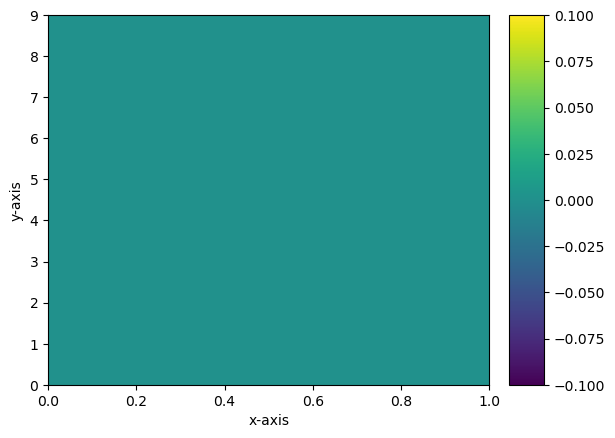

In [20]:
h.plot()

In [21]:
h.project("x")

Hist(Regular(10, 0, 1, name='x', label='x-axis'), storage=Int64()) # Sum: 0.0 (3.0 with flow)

In [22]:
h[{"y": 0.5j + 3, "x": 5j}]

0

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f792244c760>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f792244cd30>, text=[])

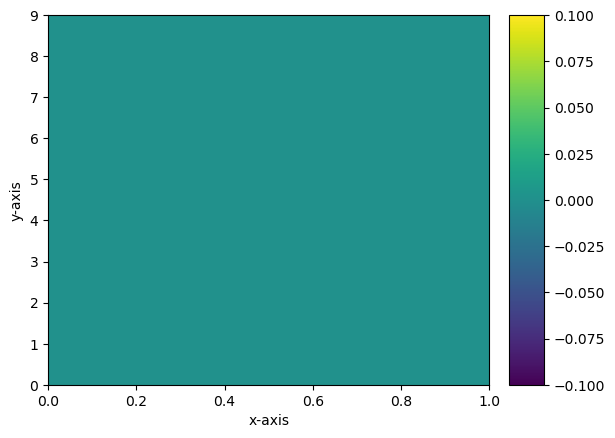

In [23]:
h.plot()


/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


(ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f79225be880>, cbar=None, text=[]),
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f79225e2220>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f79210488b0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)])

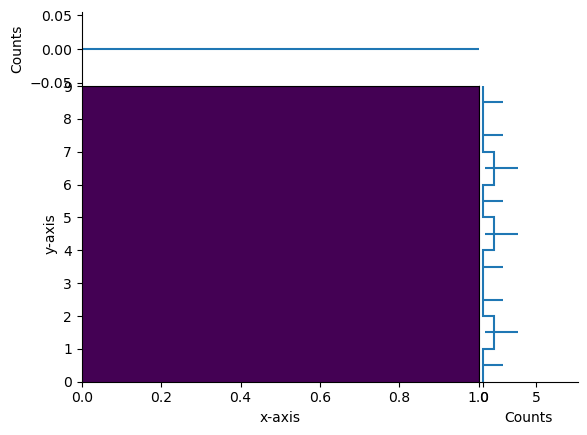

In [24]:
h.plot2d_full()

In [25]:
h.density()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [26]:


import correctionlib

In [27]:
ceval = correctionlib.CorrectionSet.from_file("mycorrections2.json")
list(ceval.keys())

FileNotFoundError: [Errno 2] No such file or directory: 'mycorrections2.json'

In [28]:
ceval['phimod']

NameError: name 'ceval' is not defined

In [29]:


for corr in ceval.values():
    print(f"Correction {corr.name} has {len(corr.inputs)} inputs")
    for ix in corr.inputs:
        print(f"   Input {ix.name} ({ix.type}): {ix.description}")



NameError: name 'ceval' is not defined

In [30]:
corr = ceval2

print(f"Correction {corr.name} has {len(corr.inputs)} inputs")
for ix in corr.inputs:
    print(f"   Input {ix.name} ({ix.type}): {ix.description}")

NameError: name 'ceval2' is not defined

In [31]:
ceval.values()

NameError: name 'ceval' is not defined

In [32]:
corr['inputs']

NameError: name 'corr' is not defined

In [33]:
from Filesets import CollectDatasets

In [34]:
filesets = CollectDatasets('root://xcache/')


FileNotFoundError: [Errno 2] No such file or directory: 'TTbarAllHadUproot/nanoAODv9Files/QCD/QCD_NanoAODv9_UL16_preVFP.txt'

In [35]:
filesets.keys()

NameError: name 'filesets' is not defined

In [ ]:
for key in filesets.keys():
    if 'post' in key:
        print(key.replace('UL16preVFP_', ''), filesets[key][0][24:])
    else:
        print(key.replace('UL16preVFP_', ''), filesets[key][0])#[0][24:])

In [ ]:
fname = 'root://xcache//store/mc/RunIISummer20UL16NanoAODAPVv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/NANOAODSIM/106X_mcRun2_asymptotic_preVFP_v11-v1/280000/28D6431D-53B5-4848-9711-1004968A7B19.root'
fname = 'root://xcache//store/mc/RunIISummer20UL16NanoAODAPVv9/RSGluonToTT_M-5000_TuneCP5_13TeV-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_preVFP_v11-v1/130000/DA014FEE-3263-D34B-B599-0B88643965DF.root'
fname = 'root://xcache//store/mc/RunIISummer20UL16NanoAODAPVv9/TT_Mtt-700to1000_TuneCP5_13TeV-powheg-pythia8/NANOAODSIM/106X_mcRun2_asymptotic_preVFP_v11-v1/2530000/A3B85074-0EBB-B244-BBFA-CEEDBDD0A2C5.root'
fname = 'root://xcache//store/mc/RunIISummer20UL16NanoAODAPVv9/ZprimeDMToTTbarResoIncl_MZp5000_Mchi10_V1_TuneCP5_13TeV-madgraph_pythia8/NANOAODSIM/106X_mcRun2_asymptotic_preVFP_v11-v1/280000/5EAF12A2-E3AF-D744-A7D4-9F2665FDB8E2.root'


In [ ]:
fname

In [ ]:
rfile = uproot.open(fname)
# events = NanoEventsFactory.from_root(fname, schemaclass=NanoAODSchema).events()
# events.fields

In [ ]:
events = NanoEventsFactory.from_root(fname, schemaclass=NanoAODSchema).events()

In [ ]:
for obj in events.fields:
    if 'lhe' in obj.lower():
        print(obj)

In [ ]:
ttagcats = ["AT&Pt", "at", "pret", "0t", "1t", ">=1t", "2t", ">=0t"] 
btagcats = ["0b", "1b", "2b"]
ycats = ['cen', 'fwd']
anacats = np.array([ t+b+y for t,b,y in itertools.product( ttagcats, btagcats, ycats) ])

In [36]:
# output = util.load('CoffeaOutputsForCombine/Coffea_SecondRun/TT/MediumBTag/2016/noAPV/TTbarRes_0l_UL16postVFP_TTbar_weighted_btagUnc_central.coffea')
# output = util.load('CoffeaOutputsForCombine/Coffea_SecondRun/TT/MediumBTag/2016/noAPV/TTbarRes_0l_UL16postVFP_TTbar_weighted.coffea')
output = util.load('CoffeaOutputsForCombine/Coffea_SecondRun/RSGluonToTT/MediumBTag/2016/noAPV/TTbarRes_0l_UL16postVFP_RSGluon5000_weighted_jerUnc_jer.coffea')

In [37]:
output.keys()

dict_keys(['ttbarmass', 'ttbarmass_jerUp', 'ttbarmass_jerDown', 'ttbarmass_jerNom', 'ttbarmass_pdfUp', 'ttbarmass_pdfDown', 'ttbarmass_pdfNom', 'jetmass', 'SDmass', 'SDmass_precat', 'jetpt', 'jeteta', 'jetphi', 'probept', 'probep', 'jety', 'jetdy', 'deepTag_TvsQCD', 'deepTagMD_TvsQCD', 'tau32', 'tau32_2D', 'tau32_precat', 'subjetmass', 'subjetpt', 'subjeteta', 'subjetphi', 'numerator', 'denominator', 'cutflow'])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f79210bbbe0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

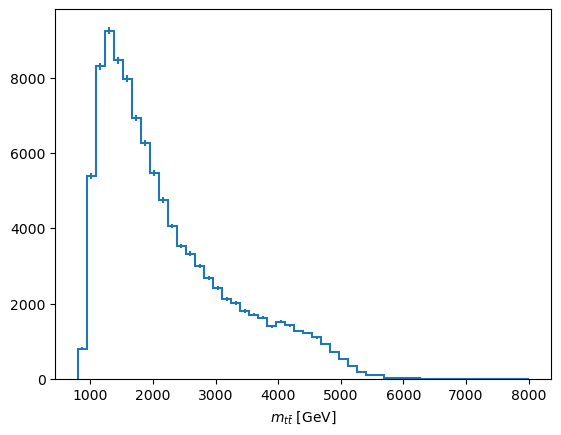

In [38]:
output['ttbarmass'][{"anacat":sum}].plot1d(overlay="dataset")#, histtype="fill", stack=True)


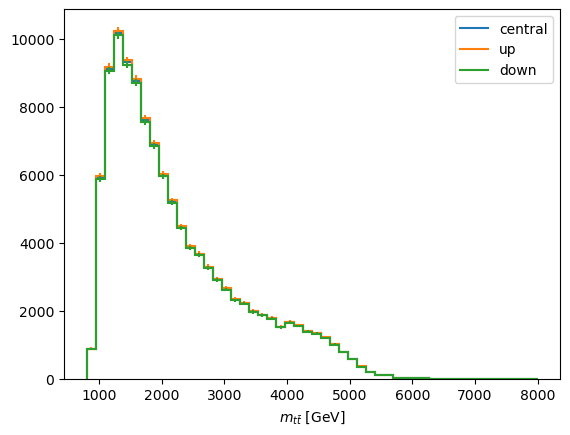

In [39]:
output['ttbarmass_jerNom'][{"anacat":sum}].plot1d(overlay="dataset")
output['ttbarmass_jerUp'][{"anacat":sum}].plot1d(overlay="dataset")
output['ttbarmass_jerDown'][{"anacat":sum}].plot1d(overlay="dataset")
# plt.ylim(1500, 2000)
plt.legend(['central', 'up', 'down'])

In [40]:
for i in range(48):
    
    print(anacats[i], output['ttbarmass_jerNom'].sum().value)
    
    
    output['ttbarmass_jerUp'][{"anacat":i}].plot1d(overlay="dataset")#, histtype="fill", stack=True)
    output['ttbarmass_jerDown'][{"anacat":i}].plot1d(overlay="dataset")#, histtype="fill", stack=True)
    output['ttbarmass_jerNom'][{"anacat":i}].plot1d(overlay="dataset")#, histtype="fill", stack=True)
    plt.legend([anacats[i]])
    plt.show()


NameError: name 'anacats' is not defined

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7920ccf640>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

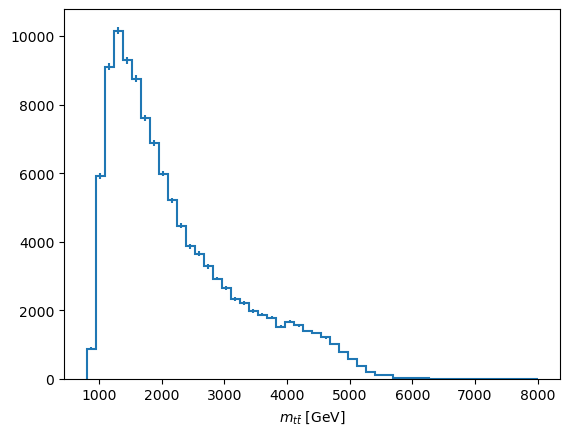

In [41]:
output['ttbarmass_jerNom'][{"anacat":sum}].plot1d(overlay="dataset")#, histtype="fill", stack=True)


In [42]:
output.keys()

dict_keys(['ttbarmass', 'ttbarmass_jerUp', 'ttbarmass_jerDown', 'ttbarmass_jerNom', 'ttbarmass_pdfUp', 'ttbarmass_pdfDown', 'ttbarmass_pdfNom', 'jetmass', 'SDmass', 'SDmass_precat', 'jetpt', 'jeteta', 'jetphi', 'probept', 'probep', 'jety', 'jetdy', 'deepTag_TvsQCD', 'deepTagMD_TvsQCD', 'tau32', 'tau32_2D', 'tau32_precat', 'subjetmass', 'subjetpt', 'subjeteta', 'subjetphi', 'numerator', 'denominator', 'cutflow'])

In [47]:
# from dask.distributed import Client

# client = Client("tls://morris35-40buffalo-2eedu.dask.cmsaf-prod.flatiron.hollandhpc.org:8786")
# client

In [ ]:
from dask.distributed import Client
from coffea_casa import CoffeaCasaCluster

# cluster = CoffeaCasaCluster()

In [ ]:
client = Client('tls://morris35-40buffalo-2eedu.dask.cmsaf-prod.flatiron.hollandhpc.org:8786')

In [ ]:
cluster = CoffeaCasaCluster()

In [ ]:
client = Client('tls://morris35-40buffalo-2eedu.dask.cmsaf-prod.flatiron.hollandhpc.org:8786')

In [ ]:
cluster = CoffeaCasaCluster(cores=11, memory="100 GiB",death_timeout=30.,
                            scheduler_options={"port": "8778", "dashboard_address": "8779"}
                           
                           )

In [ ]:
client

In [ ]:
cluster = CoffeaCasaCluster()

In [ ]:
from dask_jobqueue import PBSCluster


In [ ]:
cluster = PBSCluster(cores=15, memory='100GB')